<a href="https://colab.research.google.com/github/utkudener/Face-Detection-with-Deep-Learning/blob/main/CNNVersion1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
import tensorflow as tf
import glob
import PIL

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Veri Setini Yükleme


In [ ]:
import tensorflow as tf
import numpy as np
import glob
import random
from sklearn.model_selection import train_test_split

# Negatif ve pozitif veri yollarını ayarlayın
base_negatif_path = "/content/drive/MyDrive/SMILEs/negatives/negatives7"
base_pozitif_path = "/content/drive/MyDrive/SMILEs/positives/positives7"
img_height = 64
img_width = 64
batch_size = 32

# Veri seti yükleme ve etiketleme
image_data = []
labels = []

# Negatif resimler
negatives = list(glob.glob(f"{base_negatif_path}/*.jpg"))
print(f"Found {len(negatives)} negative images.")



for image_path in negatives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(0)  # Negatif olarak etiketleme

# Pozitif resimler
positives = list(glob.glob(f"{base_pozitif_path}/*.jpg"))
print(f"Found {len(positives)} positive images.")
for image_path in positives:
    img = tf.keras.preprocessing.image.load_img(
        image_path, target_size=(img_height, img_width), color_mode='grayscale'
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(1)  # Pozitif olarak etiketleme

# Kontrol: Resimler alındı mı?
print(f"Total images loaded: {len(image_data)}")
if len(image_data) == 0:
    print("No images were loaded. Please check your paths and ensure the images exist.")
else:
    print("Images successfully loaded.")

# Veriyi numpy array'e dönüştürme
image_data = np.array(image_data)
labels = np.array(labels)

# Kontrol: Numpy array boyutları
print(f"image_data shape: {image_data.shape}")
print(f"labels shape: {labels.shape}")

# Veriyi train ve validation setlerine ayırma
train_images, val_images, train_labels, val_labels = train_test_split(image_data, labels, test_size=0.2, random_state=123)

# Kontrol: Train ve validation set boyutları
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")

# Veriyi tf.data.Dataset'e dönüştürme
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)


class_names = ["Negative", "Positive"]


Found 9475 negative images.
Found 3690 positive images.
Total images loaded: 13165
Images successfully loaded.
image_data shape: (13165, 64, 64, 1)
labels shape: (13165,)
Train images shape: (10532, 64, 64, 1)
Validation images shape: (2633, 64, 64, 1)


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Model oluşturma
model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (2, 2), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',  # İkili sınıflandırma için uygun kayıp fonksiyonu
  metrics=['accuracy']
)

# Model yapısını gösterme
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
330/330 [==============================] - 7s 5ms/step - loss: 0.3890 - accuracy: 0.8235 - val_loss: 0.2758 - val_accuracy: 0.8880
Epoch 2/10
330/330 [==============================] - 1s 4ms/step - loss: 0.2772 - accuracy: 0.8889 - val_loss: 0.2609 - val_accuracy: 0.8959
Epoch 3/10
330/330 [==============================] - 1s 4ms/step - loss: 0.2527 - accuracy: 0.8981 - val_loss: 0.3412 - val_accuracy: 0.8625
Epoch 4/10
330/330 [==============================] - 1s 4ms/step - loss: 0.2398 - accuracy: 0.9064 - val_loss: 0.2458 - val_accuracy: 0.8986
Epoch 5/10
330/330 [==============================] - 1s 4ms/step - loss: 0.2247 - accuracy: 0.9133 - val_loss: 0.2342 - val_accuracy: 0.9028
Epoch 6/10
330/330 [==============================] - 1s 4ms/step - loss: 0.2152 - accuracy: 0.9132 - val_loss: 0.2385 - val_accuracy: 0.9039
Epoch 7/10
330/330 [==============================] - 1s 4ms/step - loss: 0.1999 - accuracy: 0.9223 - val_loss: 0.2372 - val_accuracy: 0.9043
Epoch 

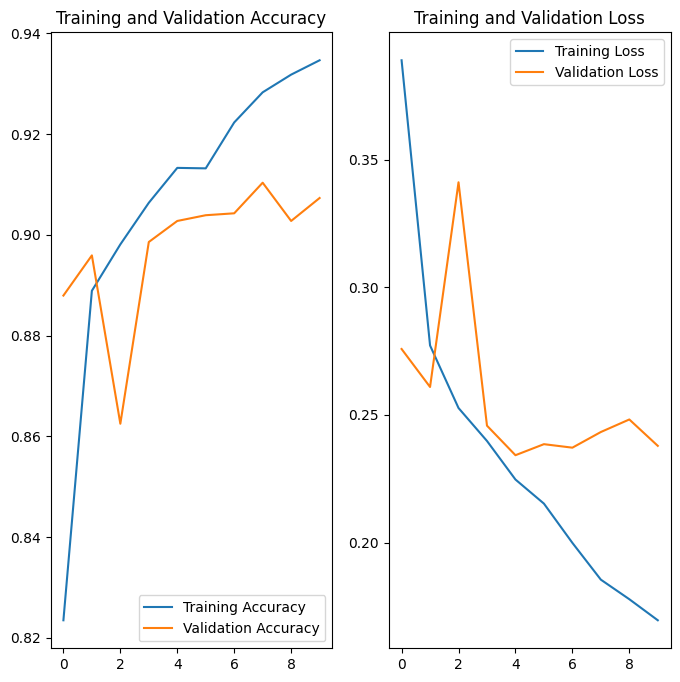

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()